In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")

# SAXS. Form-factors. Sphere

Original: https://www.ncnr.nist.gov/resources/sansmodels/Sphere.html

Author: Denis Korolkov

Calculates the form factor, $P(q)$, for a monodisperse spherical particle with uniform scattering length density. The form factor is normalized by the particle volume as described below.


## Parameters

Parameter|	Variable|	Value
---------|----------|--------
0|	Scale|	1.0
1|  Radius (Å)|	60.0
2|	Contrast ($Å^{-2}$)|	1.0e-6
3|	Incoherent Background ($cm^{-1}$)|	0.0

## Usage notes

The function calculated is:

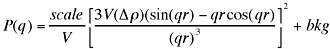

The returned value is scaled to units of $cm^{-1}$

Parameter[0] (scale) and Parameter[2] (contrast) are both multiplicative factors in the model and are perfectly correlated. One or both of these parameters must be held fixed during model fitting.

## Reference

Guinier, A. and G. Fournet, "Small-Angle Scattering of X-Rays", John Wiley and Sons, New York, (1955).



In [ ]:

I0 = esc.par("Scale", 1, scale=1e8, fixed=True)
R = esc.par("Radius", 60, units=esc.angstr)
rho = esc.par("Contrast", 1, scale=1e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

V = 4/3 * np.pi*esc.pow(R, 3)
QR = q*R
P1 = I0/V*esc.pow(3*V*rho*(esc.sin(QR)-QR*esc.cos(QR))/esc.pow(QR, 3), 2)+bkgr
show(P1, coordinates=np.linspace(0.001, 0.3, 128), figtitle="Sphere", 
     xlog=True, ylog=True, xlabel=f"Q{esc.angstr}⁻¹", ylabel="P(q)[cm⁻¹]")